# **Project 6 - Poisson Image Editing**
CIS 5810 - Fall 2023

# **Introduction**

In this project we want to blend a portion of a source image onto a target image using a technique called Poisson Image Editing. This technique uses gradient blending to seamlessly compose two images together.

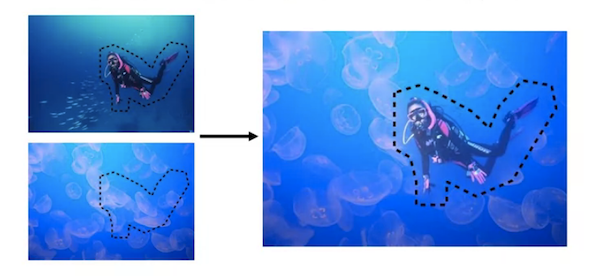

If we use the techniques of copy-and-paste or alpha blending, we can see that the results are not optimum, especially where the region of the source image borders the region of the target image.

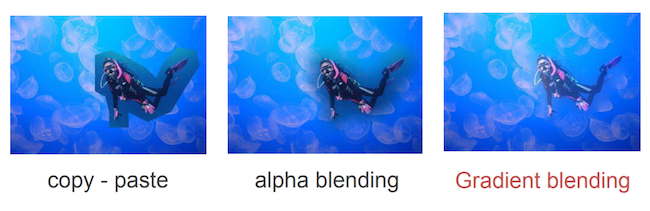

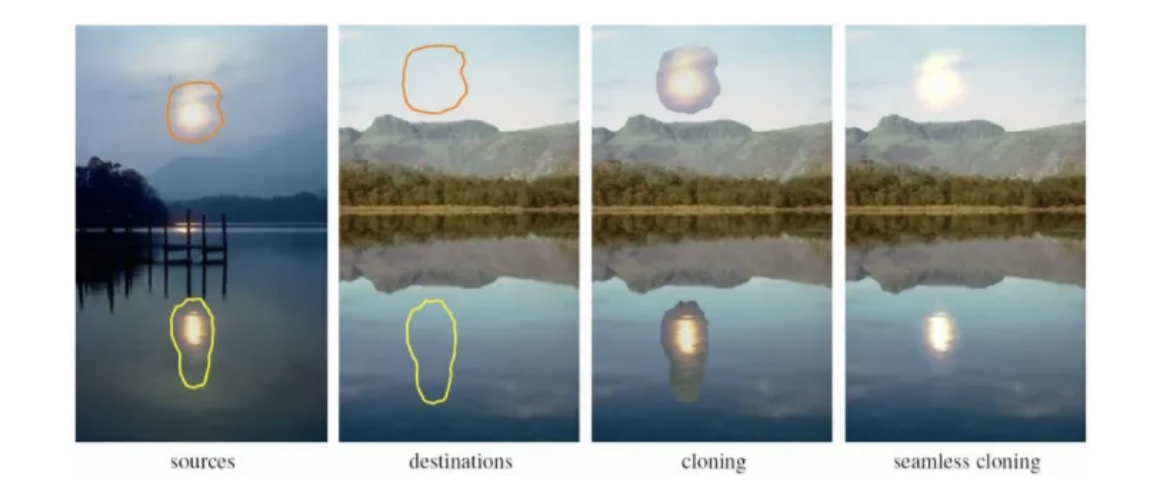

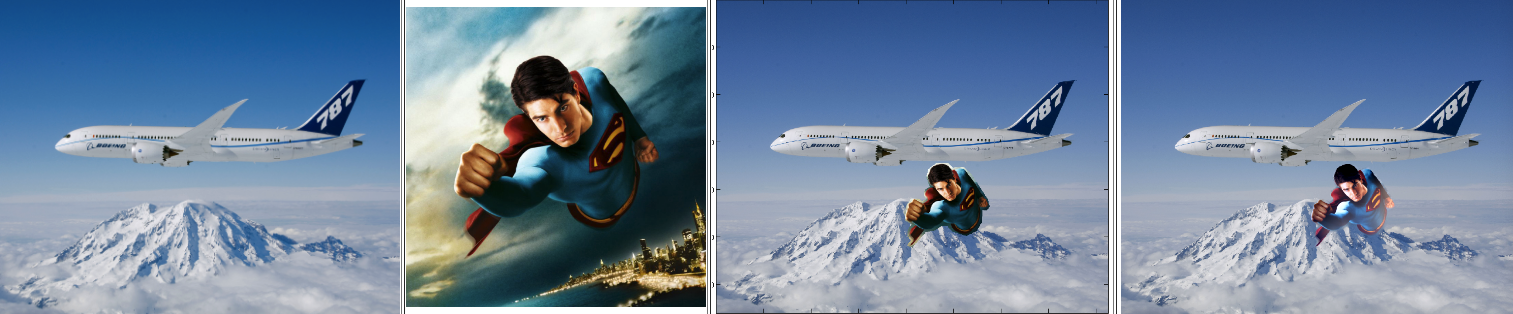

# **Part 1 - Poisson image editing**

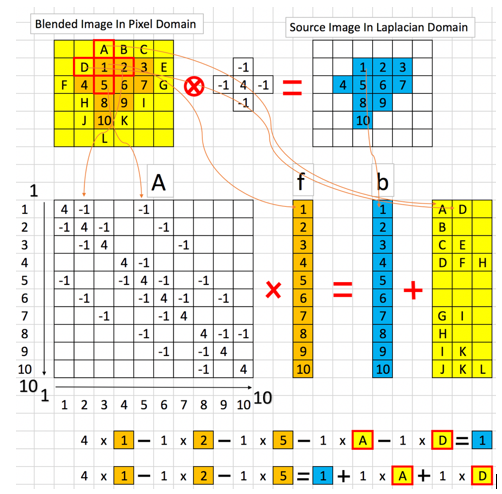

Inside the final function seamlessCloningPoisson(), you will see the following steps will be done:

Step 1: Index the replacement pixels (pixels from the source image inside the mask, where the mask is True or 1). This is done by the function **getIndexes()**.

Step 2: Compute the Laplacian matrix $A$. This is done by the function **getCoefficientMatrix()**.

Step 3: Compute the solution vector $b$. This is done by the function **getSolutionVect()**.

Step 4: Solve for x in the equation $Ax = b$ to get the new pixels in the replacement area. This is done by the function **solveEqu()** (in the diagram above x is f).

Step 5: Reconstruct the image. This is done by the function **reconstructImg()**.

In the following exercises, we will show you techniques that you can implement for each step of the blending process.

## **Step 1: getIndexes()**
Index pixels in the blending area from 1 to $N$, where $N$ is the total number of pixels inside the mask.

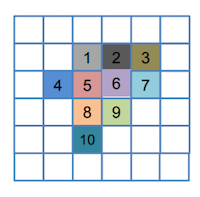

In [ ]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
import scipy.signal

In [ ]:
# Target image with shape (10, 10).
value = 9
rows = 10
cols = 10
target_img = np.tile(value, (rows, cols))

print(target_img)

[[9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]]


In [ ]:
# Mask with shape (6, 6).
mask = np.zeros((6, 6))
mask[1, 2:5] = 1
mask[2, 1:5] = 1
mask[3, 2:4] = 1
mask[4, 2] = 1

print(mask)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
# Offset.
# The offset will be given, which indicates the position of the replacement pixels in the target image.
offset_x = 1
offset_y = 2

#In the project the offset is provided to you and is manually set.
#But there exist efficient algorithms to find the best offset according to the task. To ensure that the boundary gradients are similar for the source and the target image.

Create Index Matrix Using for Loops

In [ ]:
indexes = np.zeros((rows, cols))
idx = 1
for i in range(6):
  for j in range(6):
    if mask[i][j]>0:
      indexes[i+offset_y][j+offset_x]=idx
      idx+=1
print(indexes)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
# Use meshgrid.
# Meshgrid splits the x and y coordinates.
mask_H, mask_W = mask.shape
mask_x, mask_y = np.meshgrid(np.arange(mask_W), np.arange(mask_H))
print("mask_x")
print(mask_x)
print("mask_y")
print(mask_y)


# Find target image coordinates for appropriate mask values.


# Setup indexes.


# Apply the offset to align correctly. Caution: x_offset is for the columns and y_offset is for the rows.
# Caution: careful if offset goes beyond image edge.


# Fill in the indexes from 1 to N.
# indexes will have a shape same as the target image.

# print("target_img_x.shape[0]")
# print(target_img_x.shape[0])
# indexes[target_img_y, target_img_x] = np.arange(1, target_img_x.shape[0] + 1)
# print(indexes.shape)
# print(indexes)

mask_x
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
mask_y
[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]
 [5 5 5 5 5 5]]


In [ ]:
# Use meshgrid.
# Meshgrid splits the x and y coordinates.
mask_H, mask_W = mask.shape
mask_x, mask_y = np.meshgrid(np.arange(mask_W), np.arange(mask_H))
print("mask_x")
print(mask_x)
print("mask_y")
print(mask_y)


mask_x
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
mask_y
[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]
 [5 5 5 5 5 5]]


In [ ]:
# Find target image coordinates for appropriate mask values.
target_x_coord = mask_x[mask>0]
target_y_coord = mask_y[mask>0]
print(target_x_coord)
print(target_y_coord)

[2 3 4 1 2 3 4 2 3 2]
[1 1 1 2 2 2 2 3 3 4]


In [ ]:
# Setup indexes.
target_img_H = target_img.shape[0]
target_img_W = target_img.shape[1]
indexes = np.zeros((target_img_H, target_img_W))
print(indexes)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Apply the offset to align correctly. Caution: x_offset is for the columns and y_offset is for the rows.
# Caution: careful if offset goes beyond image edge.
target_img_x = target_x_coord + offset_x
target_img_y = target_y_coord + offset_y
print("target_img_x")
print(target_img_x)
print("target_img_y")
print(target_img_y)


target_img_x
[3 4 5 2 3 4 5 3 4 3]
target_img_y
[3 3 3 4 4 4 4 5 5 6]


In [ ]:
# Fill in the indexes from 1 to N.
# indexes will have a shape same as the target image.
print("target_img_x.shape[0]")
print(target_img_x.shape[0])
indexes[target_img_y, target_img_x] = np.arange(1, target_img_x.shape[0] + 1)
print(np.arange(1, target_img_x.shape[0] + 1))
print(indexes.shape)
print(indexes)

target_img_x.shape[0]
10
[ 1  2  3  4  5  6  7  8  9 10]
(10, 10)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


## **Step 2: getCoefficientMatrix()**
Build a matrix $A$ that will mimic the computation of that happens when the Laplacian operator/kernal is convoluted to each of the pixels in the mask.

$A$ will have a shape of $(N, N)$.

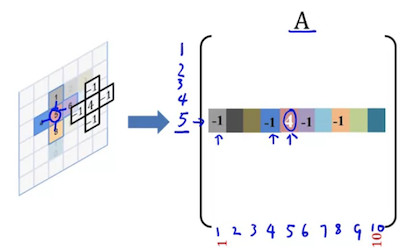

In [ ]:
# We create the coefficient matrix and put all 4s in the middle diagonal
# The y-axis of A (starting from top left corner at 1) denotes the index number.
# The x-axis of A (starting form the botttom left corner at 1) denotes the index number of the neighbor.
A = 4 * np.eye(target_img_H)
print(A)

[[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


In [ ]:
# Fill in -1 inside the index value for all the neighbors (that is an indexed pixel)
indexes_H, indexes_W = indexes.shape
indexes_x, indexes_y = np.meshgrid(np.arange(indexes_W), np.arange(indexes_H))
# x, y are the coordinates for each indexed pixels in the meshgrid.
x = indexes_x[indexes > 0]
y = indexes_y[indexes > 0]
print("indexes:")
print(indexes)
print("indexes_x")
print(indexes_x)
print("indexes_y")
print(indexes_y)
print(f"x: {x}")
print(f"y: {y}")



indexes:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
indexes_x
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
indexes_y
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
x: [3 4 5 2 3 4 5 3 4 3]
y: [3 3 3 4 4 4 4 5 5 6]


In [ ]:
y_neighbor = np.arange(indexes_H)
print(f"indexes_H: {indexes_H}")

# We want to get the meshgrid coordinates of all the neighbors of each indexed pixel inside the mask.
# Example: for indexed pixel 1 in the mask:
# [4 -1 0 0 -1]

# Left neighbors
left_y = y
left_x = x-1
# Get the values from indexes for the left neighbor of each indexed pixel.
left_neighbor = indexes[left_y, left_x]
# Get the coordinates for each neighbor (that is within the mask) to place into matrix A.
left_y_neighbor = y_neighbor[left_neighbor > 0]
left_x_neighbor = (left_neighbor[left_y_neighbor] - 1).astype(int)

print(f"y_neighbor: {y_neighbor}")
print(f"left_neighbor: {left_neighbor}")
# We can see that there are 6 left neighbors in total.
print(f"left_x_neighbor: {left_x_neighbor}")
print(f"left_y_neighbor: {left_y_neighbor}")

indexes_H: 10
y_neighbor: [0 1 2 3 4 5 6 7 8 9]
left_neighbor: [0. 1. 2. 0. 4. 5. 6. 0. 8. 0.]
left_x_neighbor: [0 1 3 4 5 7]
left_y_neighbor: [1 2 4 5 6 8]


In [ ]:
A[left_y_neighbor, left_x_neighbor] = -1

print("Indexes")
print(indexes)
print("A")
# y-axis is the index number of the pixel
# x-axis is the index number of the pixel's neighbor
print(A)
print(A.shape)

Indexes
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
A
[[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]
(10, 10)


In [ ]:
# Insert -1 for the neighbor positions in the coefficient matrix
# Meshgrid power.
A[left_y_neighbor, left_x_neighbor] = -1

print("Indexes")
print(indexes)
print("A")
print(A)
print(A.shape)

Indexes
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
A
[[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]
(10, 10)


We can see that our result of $A$ will have a lot of values that are zero, and if we try to compute this on large image sizes it will take more computational time and memory used. There ae at most 4 nonzero elements in each row of $A$.

Thus we can use the cooncept of a sparse matrix for our matrix $A$. The advantage of a sparse matrix is that it will reduce the total computational time taken for operations.

The Scipy library has a module to deal with sparse data. The type of sparse matrix we can use is CSR (Compressed Sparse Row) which allows fast row slicing and faster matrix vector products.

The output A can be displayed in the 2d form, or as a list of the indexes of the values that are not zero.

In [ ]:
# Example of scipy.sparse.csr_matrix().
arr = np.array([[0, 0, 0, 0, 0, 1, 2, 0, 3],
                [1, 0, 0, 0, 0, 0, 0, 0, 0]])
arr_sparse = scipy.sparse.csr_matrix(arr)
print(arr_sparse)

  (0, 5)	1
  (0, 6)	2
  (0, 8)	3
  (1, 0)	1


In [ ]:
data = np.array([1, 2, 3, 4])
row = np.array([0, 1, 2, 0])
col = np.array([0, 1, 2, 1])

A2_sparse = scipy.sparse.csr_matrix((data, (row, col)), shape=(3, 3))
print(A2_sparse)

# You can use todense() or toarray() to convert the matrix to the 2d format.
A2_sparse.todense()

  (0, 0)	1
  (0, 1)	4
  (1, 1)	2
  (2, 2)	3


matrix([[1, 4, 0],
        [0, 2, 0],
        [0, 0, 3]])

In [ ]:
A3_sparse = scipy.sparse.csr_matrix(A)
A3_sparse.toarray()

array([[ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]])

$A$ is the same across all color channels thus we do it only once.

## **Step 3: getSolutionVect()**
Now we need to construct the target solution vector $b$.

First, we need to convolve the source image with the Laplacian kernel. $b$ will consist of the pixels from inside the mask.

Second, we need to add back the boundary pixels (those in the non-blending area) in the target image (these are the neighbor pixels that are not an indexed pixel inside the mask). In our above example, pixel with value 1 inside the max has two neighbors that are not indexed pixels (the top and left neighbors).

$b$ will have a shape of $(N, 1)$. There will be an output for $b$ for each color channel.

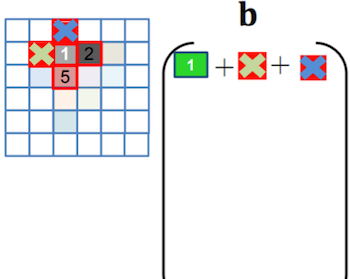

In [ ]:
# Create random values for the target image.
target_img = np.random.rand(target_img_H, target_img_W)
print(target_img.shape)
print(target_img)

(10, 10)
[[0.46357325 0.54682489 0.26649061 0.31725656 0.20465412 0.13067267
  0.06319401 0.62892397 0.97917618 0.28985131]
 [0.88471045 0.83674719 0.80069719 0.17082417 0.36362283 0.4786832
  0.49819978 0.63628414 0.80382268 0.94935057]
 [0.56022908 0.78006337 0.8010786  0.10827474 0.73021688 0.68459982
  0.05478105 0.68058711 0.06917789 0.2119919 ]
 [0.43079489 0.44532249 0.52898993 0.98775682 0.91230203 0.35007112
  0.54624124 0.42427036 0.44241158 0.58411437]
 [0.056147   0.90579941 0.01695376 0.03120225 0.07677906 0.36128307
  0.07713378 0.18454574 0.23554819 0.67930107]
 [0.84816214 0.50603754 0.68785972 0.19276975 0.61149985 0.31925525
  0.35023642 0.65544393 0.60695277 0.89436237]
 [0.75410404 0.79940488 0.21559592 0.32199182 0.49388937 0.3998816
  0.49268609 0.12944852 0.19752667 0.26092792]
 [0.7159998  0.05688307 0.05286275 0.47263768 0.33646148 0.0447186
  0.24991964 0.52843588 0.93553696 0.00405875]
 [0.36709982 0.2789861  0.42028429 0.0649296  0.22370136 0.05679077
  0.77

In [ ]:
source_img = np.random.rand(6, 6)
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
source_laplacian = scipy.signal.convolve2d(source_img, laplacian, 'same')
print(source_laplacian)

[[ 1.64264305  1.81472236  1.43024963  0.17468707 -0.69669565  2.48359987]
 [-0.19122023 -0.79939994 -1.43382543 -0.59158798  0.52868697  1.2294918 ]
 [-0.16589151 -1.48983107  2.39977484  0.76552816 -1.96965153  0.51725563]
 [ 0.73141134  1.14451419 -1.03675844  0.7007695   0.28002972  0.90123402]
 [ 0.72489107  0.70142275 -0.39602086 -2.47628488  1.81393756  0.64995218]
 [ 2.08836846 -0.17867414  1.94394155  0.26372517  1.32242327 -0.35571423]]


In [ ]:
# Laplacian part of b.
# Subtract the offset to get back the pixel location in the source image.
# x and y are the coordinates of the masked pixels in indexes (meshgrid).
source_y = y - offset_y
source_x = x - offset_x
# We only want a subset of pixels of the region inside the mask from the source image.
laplacian_b = source_laplacian[source_y, source_x]
# b is an N x 1 vector.
print(laplacian_b)

[-1.43382543 -0.59158798  0.52868697 -1.48983107  2.39977484  0.76552816
 -1.96965153 -1.03675844  0.7007695  -0.39602086]


In [ ]:
# Pixel part of b.
# Create a coordinate line y_b.
y_b = np.arange(x.shape[0])

# We need to get the border neighbors and add them back to b side (if they are present).
# Left neighbors.
left_y = y
left_x = x - 1
left_neighbor = indexes[left_y, left_x]
# For the left neighbor values that are 0 in indexes (outside the mask), get their coordinates.
left_y_zero = left_y[left_neighbor == 0]
left_x_zero = left_x[left_neighbor == 0]
# Find the corresponding value in the target image for the neighbors that are 0 in indexes (outside the mask).
left_val = target_img[left_y_zero, left_x_zero]
left_b = np.zeros(x.shape[0])
# y_b[left_neighbor == 0] is position along y_b where neighbor is 0 in indexes. We want to add the neighbor back at this position in b.
# In left_b at position [y_b[left_neighbor == 0]] we store in left_val to add this to the corresponding indexed pixel in the mask.
# Indexed pixels (in the mask) number 1, 4, 8, 10 have left neighbors outside of the mask.
left_b[y_b[left_neighbor == 0]] = left_val

print("y_b")
print(y_b.shape)
print(y_b)
print("indexes")
print(indexes)
print(f"left_neighbor: {left_neighbor}")
print(f"left_x: {left_x}")
print(f"left_y: {left_y}")
# y and x coordinates of neighbors that are outside the index mask region (equal to 0).
print(f"left_x_zero: {left_x_zero}")
print(f"left_y_zero: {left_y_zero}")
print(f"left_val: {left_val}")
print("y_b[left_neighbor == 0]")
print(y_b[left_neighbor == 0])
print("left_b")
print("** Indexed pixels (in the mask) number 1, 4, 8, 10 have left neighbors outside of the mask.**")
print(left_b.shape)
print(left_b)

# Continue for right, up, down neighbors.
# Best is to print out each step to better understand what is happening.

y_b
(10,)
[0 1 2 3 4 5 6 7 8 9]
indexes
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  9.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
left_neighbor: [0. 1. 2. 0. 4. 5. 6. 0. 8. 0.]
left_x: [2 3 4 1 2 3 4 2 3 2]
left_y: [3 3 3 4 4 4 4 5 5 6]
left_x_zero: [2 1 2 2]
left_y_zero: [3 4 5 6]
left_val: [9 9 9 9]
y_b[left_neighbor == 0]
[0 3 7 9]
left_b
** Indexed pixels (in the mask) number 1, 4, 8, 10 have left neighbors outside of the mask.**
(10,)
[9. 0. 0. 9. 0. 0. 0. 9. 0. 9.]


In [ ]:
# Repeat the above for the right, up, and down neighbors.

In [ ]:
# Add the parts together to get b.
# b = laplacian_b + left_b + right_b + up_b + down_b

laplacian_b can be viewed as a guidance field (the values of the source image convolved with the Laplacian kernel), guiding the reconstruction in the target image so that the reconstruction result in the mask area (blended area) looks similar to the source image.

## **Step 4: solveEqu()**
We now know $A$ and $b$, and we can solve the equation for $f$ using scipy.sparse.linalg.spsolve(). $f$ is the replacement pixels in mask area.

$f$ will have a shape of $(N, 1)$. There will be an output for $f$ for each channel.

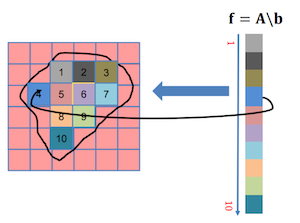

In [ ]:
# To solve equations with a sparse matrix, use scipy.sparse.linalg.spsolve()

## **Step 5: reconstructImg()**
We want to reconstruct the target image with our solution for $f$ over all the color channels as mapped by indexes.

In [ ]:
# You have b (for each channel), indexes, targetImg to reconstruct the final image.

# 1. Get nonzero component in indexes.

# 2. Stack three channels together with numpy dstack.

# 3. Copy new pixels in the indexes area to the target image.
# use numpy copy to make a copy of targetImg, otherwise the original targetImg might change, too.

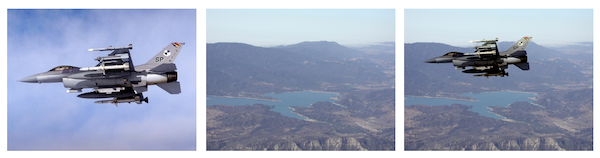

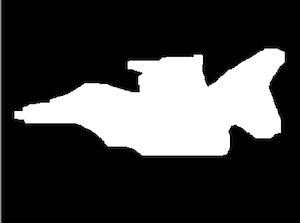

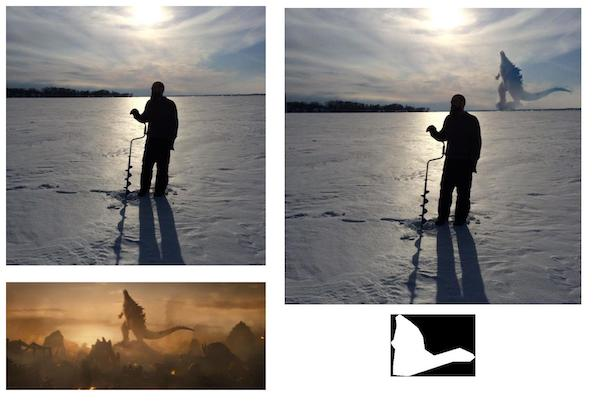

# **Part 2 - Mixing gradients**
In situations where it is better to mix gradients, we can modify $b$ to have the condition that when the gradient information is stronger from the source image, then use the source, and when the gradient information is stronger from the target image, use the target.

In this example below, if the object of the source image has holes or is transparent, it would be better visually to not let it cover the target image.

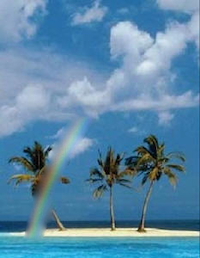

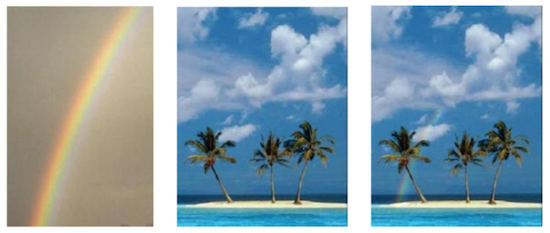

To do this, we modify the guided gradient field from

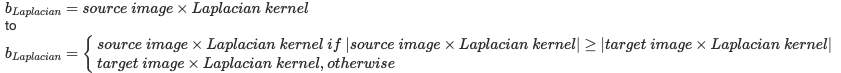

## **Step 1: getSolutionVectMixing()**



In [ ]:
# We will still add the parts together to get b.
# b = laplacian_b + left_b + right_b + up_b + down_b

# There is a modification compared to your getSolutionVect() function, where you will modify laplacian_b.
# A hint is you can use np.where()
# Remember we need to use the absolute values of |source image x Laplacian kernel| and |target image x Laplacian kernel|
z = np.array([1, 0, 1, 0, 1, 1, 1])
result = np.where(z == 1, 9, 3)
print(result)

[9 3 9 3 9 9 9]


# **Part 3 - Texture flattening**
An extension of Poisson image editing is texture flattening, where we want to keep the gradient information only when there is a sharp edge, and to zero out the gradient everywhere else. Thus only the sharpest edges will be transfered to the new edges.

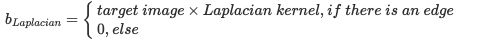

## **Step 1: getSolutionVectTexture()**

If the target image (background) has an edge at a particular pixel then we put the gradient information of the target image in the final result. If the target image has no edge at a particular pixel, then we put 0. The result will be that the image content is preserved however the small details have been removed in the regions without distinct edges.

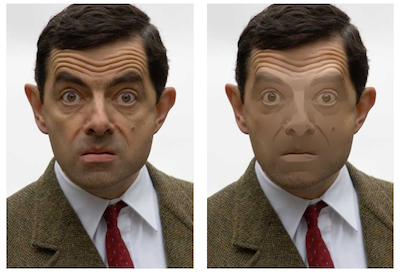

Tips: This can be implemented by treating the Laplacian kernel as [-1, 1] in four directions.

Let us consider one element in the solution vector $b$ that corresponds to $(x, y)$ in the image. Then it has four neighbors $(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)$.

In the Possion Image Editing part, the "Laplacian part" of the solution vector is $laplacian_b = (img[x, y] * 4) + (img[x - 1, y] * -1) + (img[x + 1, y] * - 1) + (img[x, y - 1] * -1) + (img[x, y + 1] - 1)$.

We can also view this as:

$laplacian_b = (img[x, y] - img[x - 1, y]) + (img[x, y] - img[x + 1, y]) + (img[x, y] - img[x, y - 1]) + (img[x, y]- img[x, y + 1])$.

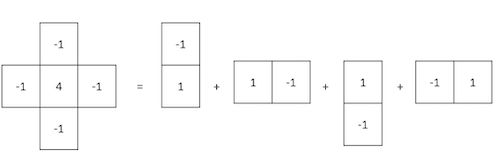

In [ ]:
# We will still add the parts together to get b.
# b = laplacian_b + left_b + right_b + up_b + down_b

# There is a modification compared to your getSolutionVect() function, where you will modify laplacian_b.
# laplacian_b will compose of 4 values (for each edge up/down/left/right) which will either be 0 (if no edge)
# or the difference between the neighbor of interest and the middle pixel (if there is an edge). This will cover all pixels in the target image.
# Example: laplacian_b = b_up_edge + b_down_edge + b_left_edge + b_right_edge

# No convolutions are involved here.

# Steps:
# 1) The parameter edges will be computed for you which runs Canny Edge detection on the target image and will output True/False.
# 2) If a pixel OR its up neighbor pixel has a value of 1 (True) in the edge map, then b_up_edge should contain the difference between the pixel (middle) and its up neighbor pixel.
# You can use np.where() and np.logical_or()

a1 = [1, 0, False, False, True]
a2 = [0, 1, True, False, True]

output = np.logical_or(a1, a2)
print(output)

[ True  True  True False  True]


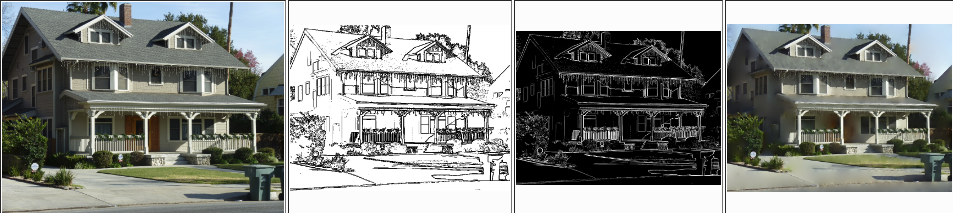